In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [62]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/state_list_all.csv')
df

,STATE,Median personal earning white,Median personal earning black,Difference_Income_Personal,White poverty rate,Black poverty rate,Difference_poverty,Unemployment white,Unemployment black,Difference_unemployment,...,White education index,White income index,Difference education index,Education spending,GDP per capita,Public assistance per capita,Minimum wage,Median peronal earning,Poverty rate,Remote rate
0,Alabama,31662,22433.0,9229.0,13.004768,30.266618,17.261849,5.554755,11.505229,5.950474,...,4.673199,4.894758,0.977380,9696,42688.71,6.585746,NaN,28864.51983,18.495659,57.637548
1,Alaska,41879,27003.0,14876.0,6.496343,16.451573,9.955230,6.167539,NaN,NaN,...,5.266660,7.049545,NaN,17725,69425.01,166.569163,9.80,36577.91741,10.340680,59.087398
2,Arizona,35370,26466.0,8904.0,11.036635,24.006826,12.970191,5.600465,10.497329,4.896864,...,5.363295,5.495628,0.947876,8238,44596.72,31.927054,10.00,30686.22761,17.372516,60.819197
3,Arkansas,29783,21467.0,8316.0,14.501356,33.857216,19.355861,4.940988,10.711158,5.770170,...,4.382345,4.008140,0.756640,10138,40641.87,184.675059,8.50,28117.17686,19.066288,55.827052
4,California,44344,31258.0,13086.0,10.036330,22.481444,12.445114,6.192211,11.923409,5.731198,...,6.223212,7.107686,1.558498,12497,67670.80,254.669724,10.50,32768.98594,15.343688,60.692573
5,Colorado,37842,30200.0,7642.0,8.247861,19.913807,11.665945,4.531674,9.714240,5.182566,...,6.373094,5.803388,2.153195,10201,59618.50,0.000000,9.30,35441.89990,11.490504,64.884788
6,Connecticut,45599,30269.0,15330.0,6.063988,20.470458,14.406471,5.244740,12.767315,7.522574,...,6.733497,7.197037,2.482233,20634,74542.31,108.051328,10.10,40436.49043,10.540539,65.991883
7,Delaware,38737,29400.0,9337.0,7.460182,20.152974,12.692792,5.496240,6.813388,1.317148,...,5.404632,6.134823,1.137370,15638,75382.46,29.600374,8.25,35913.56089,12.425640,63.298519
8,District of Columbia,68900,31571.0,37329.0,6.924996,26.574525,19.649529,3.072294,13.223717,10.151423,...,7.649900,9.511937,3.378408,22758,188788.41,NaN,11.50,50627.12788,17.319016,78.813552
9,Florida,32279,23321.0,8958.0,11.029751,25.153385,14.123635,5.949461,11.502387,5.552926,...,5.322829,5.092495,1.492107,9346,45943.47,10.211495,8.10,29524.20667,15.702154,61.416032


In [63]:
# Define confidence interval method

def CI_mean(data):
    se = np.std(data)/np.sqrt(len(data))
    low = np.mean(data)-1.96*se
    up = np.mean(data)+1.96*se
    print("Average is:", np.mean(data))
    print("95% CI of mean is: ({}, {})".format(low,up))


In [64]:
# White income CI

CI_mean(df['White income index'])

Average is: 5.354451629274506
95% CI of mean is: (5.038132757496882, 5.6707705010521305)


In [65]:
# Black income CI

CI_mean(df['Black income index'])


Average is: 3.4088522758421047
95% CI of mean is: (3.088399983832417, 3.729304567851792)


In [66]:
# Define confidence interval mean method


def CI_mean_diff(list1, list2):
    s1 = np.var(list1)
    s2 = np.var(list2)
    n1 = len(list1)
    n2 = len(list2)
    se2 = s1/n1 + s2/n2
    se = np.sqrt(se2)

    diff = np.mean(list1) - np.mean(list2)
    low = diff - 1.96 * se
    up = diff + 1.96 * se
    print("The average difference is:", diff)
    print("The 95% CI is: ({}, {})".format(low, up))

In [67]:
# CI mean difference 

CI_mean_diff(df['White income index'],df['Black income index'])

The average difference is: 1.9455993534324016
The 95% CI is: (1.4953246593878315, 2.3958740474769717)


In [68]:
# Conduct T-Test of independent means (drop null values) 

df_new = df.dropna(subset=['White income index', 'Black income index'])
stats.ttest_ind(df_new['White income index'],df_new['Black income index'], equal_var = False)

Ttest_indResult(statistic=7.658857532439532, pvalue=5.7097456450163154e-11)

In [69]:
#Conduct T-Test of related means

stats.ttest_rel(df_new['White income index'],df_new['Black income index'])

Ttest_relResult(statistic=17.840578747319807, pvalue=9.194568390902516e-20)

In [70]:
data = df_new['White income index'] - df_new['Black income index']
data

0     2.452571
2     1.184941
3     2.190556
4     1.808250
5     2.161037
6     2.904268
7     2.021392
8     4.093462
9     2.210997
10    1.921913
13    1.745653
14    1.717406
15    3.467037
16    1.833193
17    1.684766
18    3.143275
20    1.239194
21    2.521158
22    1.577063
23    3.155027
24    3.336867
25    1.621420
27    1.356377
28    1.962055
30    2.149554
32    1.302733
33    2.094854
35    2.108104
36    2.145592
37    0.461452
38    1.447784
40    2.681133
42    1.208214
43    2.174012
46    2.146117
47    1.468315
48    2.145191
49    2.380582
dtype: float64

In [71]:
# Find standard error

se = np.std(data) / np.sqrt(len(data))

In [72]:
# Find the mean

low = np.mean(data) - 1.96 * se
up = np.mean(data) + 1.96 * se
print("Mean:", np.mean(data))
print(low, up)

Mean: 2.084829241236842
1.8588197456469613 2.310838736826723


In [73]:
# Reorder states

disparity = ['Alaska','Alabama','Colorado','District of Columbia','Georgia','Illinois','Kansas','Louisiana',
                                   'Maryland','Maine','Michigan','Mississippi','New York','North Carolina','Pennsylvania',
             'Oregon','South Carolina','Tennessee','Virginia','Wisconsin']

In [74]:
# For loop to divide disparity states from non-disparity states
other = []
for state in df['STATE']:
    if state not in disparity:
        other.append(state)

In [75]:
df_disparity = df[df['STATE'].isin(disparity)]
df_other = df[df['STATE'].isin(other)]

In [76]:
# Two-way-ANOVA Test


df_disparity = df_disparity.dropna(subset = ['White income index', 'Black income index'])
df_other = df_other.dropna(subset = ['White income index', 'Black income index'])
index = df_disparity['White income index'].tolist()
race = ['White'] * len(df_disparity)
disparity = ['Disparity'] * len(df_disparity)

index += df_disparity['Black income index'].tolist()
race += ['Black'] * len(df_disparity)
disparity += ['Disparity'] * len(df_disparity)

index += df_other['White income index'].tolist()
race += ['White'] * len(df_other)
disparity += ['Other'] * len(df_other)

index += df_other['Black income index'].tolist()
race += ['Black'] * len(df_other)
disparity += ['Other'] * len(df_other)

df_index = pd.DataFrame(list(zip(index, race, disparity)), 
               columns =['Index','Race','Disparity'])


In [77]:
df_index

,Index,Race,Disparity
0,4.894758,White,Disparity
1,5.803388,White,Disparity
2,9.511937,White,Disparity
3,5.429173,White,Disparity
4,5.692095,White,Disparity
...,...,...,...
71,2.646897,Black,Other
72,2.237916,Black,Other
73,4.064689,Black,Other
74,4.407470,Black,Other


In [18]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
model = ols('Index ~ C(Race) + C(Disparity) + C(Race):C(Disparity)', data=df_index).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Race),82.583746,1.0,57.397451,9.458996e-11
C(Disparity),0.584637,1.0,0.406335,5.258574e-01
C(Race):C(Disparity),0.004745,1.0,0.003298,9.543656e-01
Residual,103.593968,72.0,NaN,NaN


In [19]:
# Define average for t-test

def average(i):
    df1 = df_disparity.dropna(subset=[i])
    df2 = df_other.dropna(subset=[i])
    test = stats.ttest_ind(df1[i],df2[i], equal_var = False)
    p = test[1]
    print("Disparity mean:", np.mean(df_disparity[i]))
    print("Other mean:", np.mean(df_other[i]))
    print("Disparity std:", np.std(df_disparity[i]))
    print("Other std:", np.std(df_other[i]))
    print("p-value:", p)
    print("Test result:", test)

In [20]:
# Find the average

average('Education spending')

Disparity mean: 13054.222222222223
Other mean: 12378.1
Disparity std: 4189.026465468446
Other std: 3429.7870764815707
p-value: 0.6023160020087053
Test result: Ttest_indResult(statistic=0.5261435957842535, pvalue=0.6023160020087053)


In [21]:
# Define CI method
def confint(i):
    se = np.std(i)/np.sqrt(len(i))
    low = np.mean(i)-1.96*se
    up = np.mean(i)+1.96*se
    return low, up

In [22]:
def confint2(i):
    df1 = df_disparity.dropna(subset=[i])
    df2 = df_other.dropna(subset=[i])
    disparity = df1[i]
    other = df2[i]
    print('Disparity', confint(disparity))
    print('Other', confint(other))

In [23]:
# Find the CI

confint2('Education spending')

Disparity (11118.990728957822, 14989.453715486623)
Other (10874.92953793284, 13881.270462067161)


In [24]:
# Create a new data frame

df1 = df[['Education spending', 'White income index', 'Black income index']]
df1 = df1.dropna()
df1

,Education spending,White income index,Black income index
0,9696,4.894758,2.442187
2,8238,5.495628,4.310688
3,10138,4.008140,1.817584
4,12497,7.107686,5.299436
5,10201,5.803388,3.642351
6,20634,7.197037,4.292769
7,15638,6.134823,4.113431
8,22758,9.511937,5.418475
9,9346,5.092495,2.881498
10,10809,5.429173,3.507261


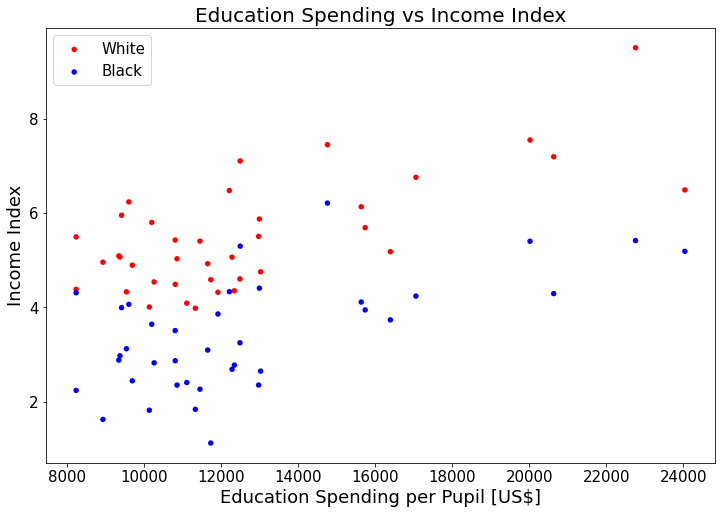

In [25]:
# Create a correlation plot
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df1['Education spending'], df1['White income index'], c='red', edgecolors='none', s=30, label='White')
axs.scatter(df1['Education spending'], df1['Black income index'], c='blue', edgecolors='none', s=30, label='Black')
plt.title("Education Spending vs Income Index", fontsize=20)
axs.set_xlabel("Education Spending per Pupil [US$]", fontsize=18)
axs.set_ylabel("Income Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [26]:
# Define values for regression 

x_vals = df1['Education spending'].values
y_vals = df1['White income index']

reg_model_1 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     White income index   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     32.46
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           1.76e-06
Time:                        13:51:35   Log-Likelihood:                -47.804
No. Observations:                  38   AIC:                             99.61
Df Residuals:                      36   BIC:                             102.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8086      0.492      5.707      0.000       1.810       3.807
x1             0.0002   3.71e-05      5.698      0.000       0.000       0.000
==============================================================================
Omnibus:                        1.909   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.739
Skew:                           0.423   Prob(JB):                        0.419
Kurtosis:                       2.381   Cond. No.                     4.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# Define values for regression 

x_vals = df1['Education spending'].values
y_vals = df1['Black income index']

reg_model_2 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Black income index   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     20.32
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           6.69e-05
Time:                        13:51:35   Log-Likelihood:                -51.304
No. Observations:                  38   AIC:                             106.6
Df Residuals:                      36   BIC:                             109.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0795      0.540      2.000      0.053      -0.015       2.174
x1             0.0002   4.07e-05      4.508      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.268   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.418
Skew:                           0.458   Prob(JB):                        0.492
Kurtosis:                       3.238   Cond. No.                     4.60e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Find the correlation between the two variables

df['Black income index'].corr(df['Education spending'])

0.600673546257254

In [29]:
# Find Pearson Correlation 
stats.pearsonr(df1['Education spending'], df1['White income index'])

(0.6885983933663067, 1.7626124891995433e-06)

In [30]:
stats.pearsonr(df1['Education spending'], df1['Black income index'])

(0.6006735462572539, 6.685013874954159e-05)

In [31]:
# Define the graph borders

x_plot = np.linspace(8000, 24000, 100)

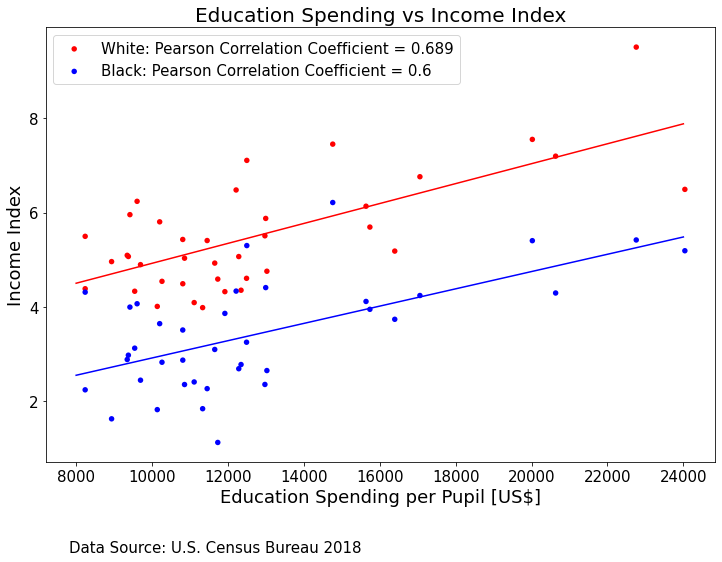

In [32]:
# Create a correlation plot

fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df1['Education spending'], df1['White income index'], c='red', edgecolors='none', s=30,
            label='White: Pearson Correlation Coefficient = 0.689')
b0 = reg_model_1.params[0]
b1 = reg_model_1.params[1]
axs.plot(x_plot, x_plot*b1 + b0, color='red')

axs.scatter(df1['Education spending'], df1['Black income index'], c='blue', edgecolors='none', s=30,
            label='Black: Pearson Correlation Coefficient = 0.6')
b0 = reg_model_2.params[0]
b1 = reg_model_2.params[1]
axs.plot(x_plot, x_plot*b1 + b0, color='blue')

plt.title("Education Spending vs Income Index", fontsize=20)
axs.set_xlabel("Education Spending per Pupil [US$]", fontsize=18)
axs.set_ylabel("Income Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.text(7800, -1.2, "Data Source: U.S. Census Bureau 2018", fontsize=15)
plt.show()

In [34]:
df1 = df[['White education index', 'White income index', 'Black education index',
          'Black income index']]
df1 = df1.dropna()
df1

,White education index,White income index,Black education index,Black income index
0,4.673199,4.894758,3.695819,2.442187
2,5.363295,5.495628,4.415419,4.310688
3,4.382345,4.008140,3.625705,1.817584
4,6.223212,7.107686,4.664714,5.299436
5,6.373094,5.803388,4.219898,3.642351
6,6.733497,7.197037,4.251264,4.292769
7,5.404632,6.134823,4.267263,4.113431
8,7.649900,9.511937,4.271492,5.418475
9,5.322829,5.092495,3.830722,2.881498
10,5.340197,5.429173,4.241800,3.507261


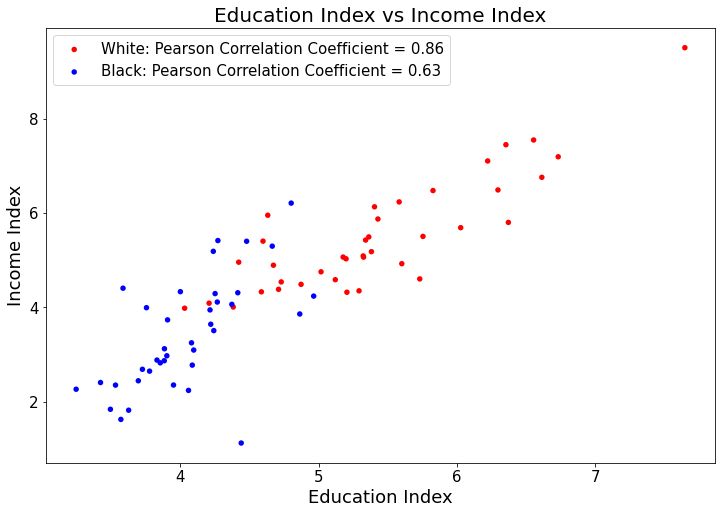

In [59]:
fig, axs = plt.subplots(figsize=(12,8))
axs.scatter(df1['White education index'], df1['White income index'], c='red', edgecolors='none', s=30, 
            label='White: Pearson Correlation Coefficient = 0.86')

axs.scatter(df1['Black education index'], df1['Black income index'], c='blue', edgecolors='none', s=30, 
            label='Black: Pearson Correlation Coefficient = 0.63')
plt.title("Education Index vs Income Index", fontsize=20)
axs.set_xlabel("Education Index", fontsize=18)
axs.set_ylabel("Income Index", fontsize=18)
axs.tick_params(labelsize=15)
axs.legend(prop={'size': 15})
plt.show()

In [46]:
x_vals = df1['White education index'].values
y_vals = df1['White income index']

reg_model_1 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     White income index   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     100.1
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           6.13e-12
Time:                        14:00:36   Log-Likelihood:                -34.750
No. Observations:                  38   AIC:                             73.50
Df Residuals:                      36   BIC:                             76.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4882      0.705     -2.111      0.042      -2.918      -0.058
x1             1.2894      0.129     10.005      0.000       1.028       1.551
==============================================================================
Omnibus:                        0.345   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.842   Jarque-Bera (JB):                0.285
Skew:                           0.194   Prob(JB):                        0.867
Kurtosis:                       2.827   Cond. No.                         39.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
x_vals = df1['Black education index'].values
y_vals = df1['Black income index']

reg_model_2 = OLS(y_vals, sm.add_constant(x_vals)).fit()
display(reg_model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Black income index   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     23.64
Date:                Sun, 27 Dec 2020   Prob (F-statistic):           2.29e-05
Time:                        14:01:40   Log-Likelihood:                -50.216
No. Observations:                  38   AIC:                             104.4
Df Residuals:                      36   BIC:                             107.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.9995      1.531     -2.612      0.013      -7.105      -0.894
x1             1.8320      0.377      4.862      0.000       1.068       2.596
==============================================================================
Omnibus:                        5.876   Durbin-Watson:                   1.530
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.587
Skew:                          -0.448   Prob(JB):                       0.0612
Kurtosis:                       4.651   Cond. No.                         43.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
df['Black income index'].corr(df['Black education index'])

0.6295896543368539

In [55]:
stats.pearsonr(df1['White education index'], df1['White income index'])

(0.8576022160652899, 6.132984853083989e-12)

In [56]:
stats.pearsonr(df1['Black education index'], df1['Black income index'])

(0.6295896543368538, 2.287812626192689e-05)

In [57]:
x_plot = np.linspace(8000, 24000, 100)